<a href="https://colab.research.google.com/github/nanoCHI/Data-Analysis/blob/main/Call_Volume_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Read CSV file

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Call_Volume_Trend_Analysis_Project_9.xlsx - Call_Data.csv')
df

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,1/23/2022,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,1/23/2022,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,1/23/2022,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,1/23/2022,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


# Cleaning The DataFrame
1. Checking For Duplicate Values
2. Checking for irrelevant columns
3. Checking for null values

In [3]:
df.duplicated().sum()

941

> So there are 941 Duplicate Values
>> Next step is to remove those rows from the dataframe

In [4]:
df = df.drop_duplicates()

# Re-checking
if(df.duplicated().sum()==0):
  print("No more duplicate values")
else:
  print("More duplicates values found")

No more duplicate values





> checking for any irrelevant columns
















In [5]:
df.keys()

Index(['Agent_Name', 'Agent_ID', 'Customer_Phone_No', 'Queue_Time(Secs)',
       'Date_&_Time', 'Time', 'Time_Bucket', 'Duration(hh:mm:ss)',
       'Call_Seconds (s)', 'Call_Status', 'Wrapped _By', 'Ringing',
       'IVR _Duration'],
      dtype='object')

> It seems there are no irrelevant columns

> Checking for null values

In [6]:
df.isnull().sum()

Agent_Name            33257
Agent_ID              33257
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By           46936
Ringing                   0
IVR _Duration             0
dtype: int64



> Dropping rows with null values






In [7]:
df.dropna()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,1/23/2022,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,1/23/2022,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,1/23/2022,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,1/23/2022,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


> After cleaning the dataframe we ended up with 70111 rows × 13 columns and ready to be analysed


# Analysis

1. Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket).

In [8]:
average_duration = df.groupby("Time_Bucket")["Call_Seconds (s)"].agg(np.average)
average_duration


Time_Bucket
10_11     99.151900
11_12    118.255262
12_13    145.761901
13_14    150.530518
14_15    147.696546
15_16    170.231375
16_17    181.501309
17_18    179.808792
18_19    174.396959
19_20    145.008845
20_21    106.920257
9_10      94.090764
Name: Call_Seconds (s), dtype: float64

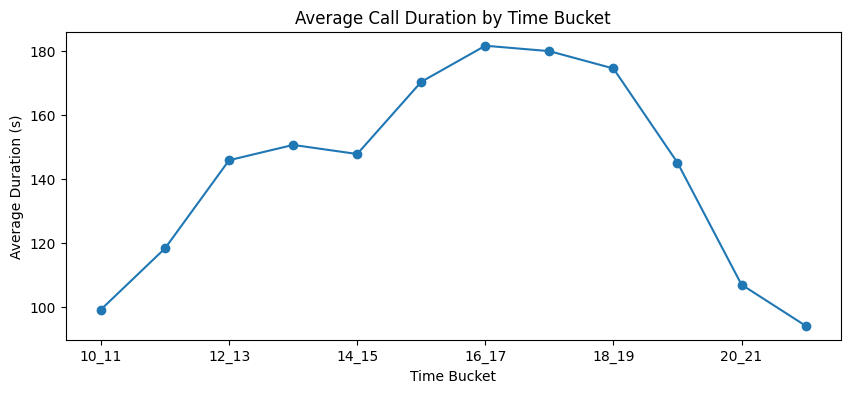

In [9]:
# Plot the average duration
average_duration.plot(kind="line", marker='o', figsize=(10, 4))

# Set the plot title and labels
plt.title("Average Call Duration by Time Bucket")
plt.xlabel("Time Bucket")
plt.ylabel("Average Duration (s)")

# Display the plot
plt.show()



> 4PM to 5PM had the highest of average of calls answered



2. Showing the total volume/ number of calls coming

In [10]:
total_calls = df.groupby("Time_Bucket").size()
total_calls

Time_Bucket
10_11    13081
11_12    14444
12_13    12562
13_14    11485
14_15    10509
15_16     9141
16_17     8785
17_18     8530
18_19     7235
19_20     6444
20_21     5455
9_10      9376
dtype: int64

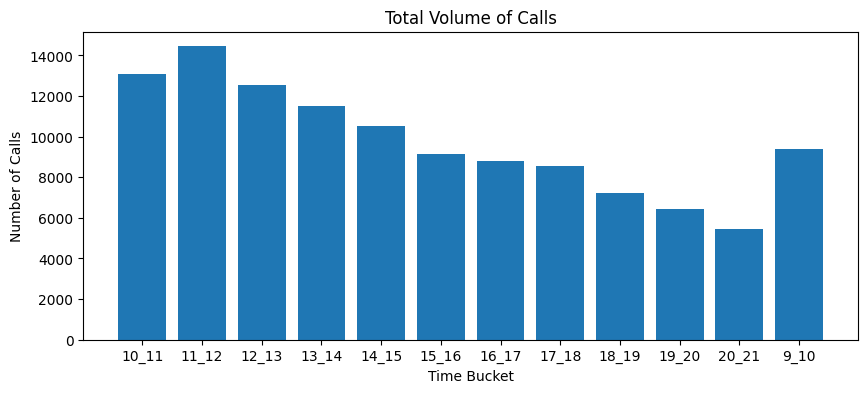

In [11]:
# Plotting a bar chart
plt.figure(figsize=(10, 4))
plt.bar(total_calls.index, total_calls)
plt.xlabel("Time Bucket")
plt.ylabel("Number of Calls")
plt.title("Total Volume of Calls")
plt.show()

> 11AM to 12PM has the highest number of call recieved

3. Calculate the required number of agents.

* calculating the total call answered

In [12]:
total_answered_calls = df[df["Call_Status"] == "answered"].shape[0]
total_answered_calls

82452

* calculating the number of agents

In [13]:
num_agents = df["Agent_ID"].nunique()
print("Number of Agents:", num_agents)

Number of Agents: 65


* calculating the average incoming calls per day

In [14]:
total_calls_incoming_per_day = df.groupby("Time_Bucket").size().mean()
print("Total Average Calls Incoming per Day:", total_calls_incoming_per_day)

Total Average Calls Incoming per Day: 9753.916666666666


* calculating calls per agent

In [15]:
# Group the dataframe by "Time_Bucket" and calculate the average number of answered calls per agent for each group
answered_calls_per_agent_T = df[df["Call_Status"] == "answered"].groupby("Time_Bucket")["Agent_ID"].count() / df.groupby("Time_Bucket")["Agent_ID"].nunique()
answered_calls_per_agent=answered_calls_per_agent_T.mean()
answered_calls_per_agent

128.92911499311612

* Determineing desired abandon rate and calculate desired call answered rate


In [16]:
current_abandon_rate = 0.3  # Current abandon rate
desired_abandon_rate = 0.1  # Desired abandon rate
change_in_abandon_rate = current_abandon_rate - desired_abandon_rate
desired_call_answered_rate = current_abandon_rate + change_in_abandon_rate

* calculating time required to answer desired percentage of incoming calls

In [17]:
time_required = (total_calls_incoming_per_day * answered_calls_per_agent * desired_call_answered_rate) / 3600
time_required

174.66164493749145

* calculating the numbers of agents required

In [18]:
hours_per_agent = 4
total_agents = time_required / hours_per_agent
total_agents = int(math.ceil(total_agents))
total_agents

44

> 68 agents are required per day

In [22]:
import math

# Step 1: Create a DataFrame or dictionary to represent the distribution of calls made in the night
night_calls = {
    'Time_Bucket': ['21_22', '22_23', '23_00', '00_01', '01_02', '02_03', '03_04', '04_05', '05_06', '06_07', '07_08', '08_09'],
    'Calls': [3, 3, 2, 2, 1, 1, 1, 1, 3, 4, 4, 5]
}

night_calls_df = pd.DataFrame(night_calls)

# Step 2: Calculate the total number of night calls
total_night_calls = night_calls_df['Calls'].sum()

# Step 3: Calculate the total number of daytime calls
total_daytime_calls = 100

# Step 4: Calculate the current abandon rate during the daytime
daytime_abandon_rate = df[(df["Time_Bucket"] >= "09_00") & (df["Time_Bucket"] <= "21_00") & (df["Call_Status"] == "Abandoned")].shape[0] / df[(df["Time_Bucket"] >= "09_00") & (df["Time_Bucket"] <= "21_00")].shape[0]

# Step 5: Determine the desired abandon rate
desired_abandon_rate = 0.1  # Desired abandon rate

# Step 6: Calculate the change in abandon rate
change_in_abandon_rate = daytime_abandon_rate - desired_abandon_rate

# Step 7: Calculate the desired call answered rate
desired_call_answered_rate = 1 - desired_abandon_rate

# Step 8: Calculate the total average calls incoming per day during the daytime
total_calls_incoming_per_day = total_daytime_calls + total_night_calls

# Step 9: Calculate the time required to answer the desired percentage of incoming calls during the daytime
time_required = (total_calls_incoming_per_day * desired_call_answered_rate) / (1 - desired_call_answered_rate)

# Step 10: Calculate the total number of agents required during the daytime
hours_per_agent_works = 7.5  # Total hours an agent works per day
agent_utilization = 0.6  # Percentage of time an agent spends on calls
total_agents_daytime = math.ceil(time_required / (hours_per_agent_works * agent_utilization))

# Step 11: Adjust the total number of agents for the night calls
additional_agents_night = math.ceil(total_night_calls / (hours_per_agent_works * agent_utilization))
additional_agents_night

7